(C) 2021, Gerold Baier, University College London

In [2]:
%matplotlib inline

# How to work

We recommend to open a new notebook or script and type and run the code. To exercise handling of Numpy arrays, avoid copy and paste. 

Study each piece by making modifications (e.g. changing the numbers and ranges of elements in the arrays) and checking the outcome.

In the plot code, check the Matplotlib features. You might use them in your own work.


# Numpy Arrays

[NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html) is the fundamental package for scientific computing in Python.  It’s the universal standard for working with numerical data in Python.

Have a look at [Array programming with NumPy](https://www.nature.com/articles/s41586-020-2649-2), an accessible review about the usability and some features of Numpy arrays. 

In particular, it states that "NumPy underpins almost every Python library that does scientific or numerical computation, including [SciPy](https://www.scipy.org), [Matplotlib](https://matplotlib.org), [Pandas](https://pandas.pydata.org), [Scikit-learn](https://scikit-learn.org/stable/)" (from the Introduction).

Below is a tutorial with some of the functionality that we are going to use in the Machine Learning Lessons.

For each of the functions you can find the Numpy documentation. But there are many versions of Numpy. To find out which version of Numpy you are using:

In [3]:
import numpy

print(numpy.__version__)


1.20.3


In this case, the corresponding documentation is found at [https://numpy.org/doc/1.20/](https://numpy.org/doc/1.20/).

# Basic Array Functionality

A tuple or list can be converted to a Numpy array using `asarray`.

In [4]:
from numpy import asarray

mylist = [10, 20, 30, 40, 50]

na_mylist = asarray(mylist)

print('List: ', mylist, '   Numpy: ', na_mylist)


List:  [10, 20, 30, 40, 50]    Numpy:  [10 20 30 40 50]


Arrays filled with only 0s or 1s are created using `zeros` and `ones`.


In [5]:
from numpy import zeros, ones

numbers = 5

na_zeros = zeros(numbers)
na_ones = ones(2*numbers)

print(na_zeros, na_ones)


[0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


For n-dimensional arrays, the dimensions must be provided as a _tuple_.

In [6]:
na_2D_zeros = zeros((numbers, 2*numbers))

print(na_2D_zeros)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


`arange` can be used to create an ordered sequence of numbers. The lower limit is inclusive, the upper limit exclusive. The default step size is 1 but other values can be specified. 


In [7]:
from numpy import arange

step_size = 0.5

na_arange = arange(0, numbers, step_size)

print(na_arange)


[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


In a similar way, `linspace` can be used to create an ordered sequence of numbers. The difference to `arange` is that you can specify the number of elements in the array directly, i.e. without having to calculate the distance between consecutive numbers. Note that in this case the upper limit is included! The upper limit can also be lower than the lower limit, resulting in a descending order. 


In [8]:
from numpy import linspace

limit_low = 11
limit_up  = 1

na_linspace = linspace(limit_low, limit_up, numbers)

print(na_linspace)


[11.   8.5  6.   3.5  1. ]


# Dimension, size and shape of an Array

You can test the dimension, the number of elements and the structure (shape) of an array by _attributes_ `ndim`, `size`, and `shape`:


In [9]:
print('Dimensions: ', na_ones.ndim, 
      '::: Number of elements: ', na_ones.size, 
      '::: Shape: ', na_ones.shape)

Dimensions:  1 ::: Number of elements:  10 ::: Shape:  (10,)


# Concatenation

Two arrays of same length can be combined (concatenated) using the function `c_`. As an unusual feature, this function requires the use of square brackets for its arguments (normally used for indexing).


In [10]:
from numpy import c_

data_a = arange(1,6)
data_b = arange(2,7)

data_c_ = c_[data_a, data_b]

print(data_a, data_b)
print('')
print(data_c_)


[1 2 3 4 5] [2 3 4 5 6]

[[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]]


Furthermore, there is also a function called `concatenate` in Numpy. Its input arrays need to be provided as a tuple. This is the result if use in analogy with `c_`:

In [18]:
from numpy import concatenate

data_concat = concatenate((data_a, data_b))

print(data_concat)


[1 2 3 4 5 2 3 4 5 6]


The arrays are concatenated in a different way. The function does have a keyword argument `axis` to concatenate along a  dimension other than the default (see the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html)).

However, see what happens if we use it naively:


In [19]:
data_concat2 = concatenate((data_a, data_b), axis=1)

print(data_a, data_b)
print('')
print(data_concat2)


AxisError: axis 1 is out of bounds for array of dimension 1

There is no dimension with index 1. Our two arrays do not have a second dimension:

In [20]:
print(data_a.shape, data_b.shape)

(5,) (5,)


If you wanted to use `concatenate` you would have to `.reshape()` the arrays into the two-dimensional form (_n_, 1), where _n_ is the length of the array.

In [21]:
data_a_reshaped, data_b_reshaped = data_a.reshape(-1, 1), data_b.reshape(-1, 1)

print(data_a_reshaped.shape, data_b_reshaped.shape)
print('')

data_concat2 = concatenate((data_a_reshaped, data_b_reshaped), axis=1)

print(data_concat2)


(5, 1) (5, 1)

[[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]]


Fortunately, there is a simpler alternative, `column_stack`.

In [22]:
from numpy import column_stack

data_stack = column_stack((data_a, data_b))

print(data_stack)


[[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]]


# Random Numbers

## Normally distributed numbers

Random number generators and related functions are in [numpy.random](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random).

For instance, `normal` can be used to create normally-distributed numbers. Their probability distribution approaches a Gaussian bell curve centered at the mean and spread with a prespecified standard deviation. The shape of the array is provided as a tuple. 


In [23]:
from numpy.random import normal

MEAN = 0
STD  = 1

na_normal = normal(loc=MEAN, scale=STD, size=(10, 4))

print(na_normal)


[[ 0.48074141 -0.91460469 -0.28564259 -0.70035629]
 [-1.55921481  0.25371696  0.45526244  2.67438696]
 [-1.7440342  -0.04039021  1.18551443 -0.83827794]
 [-0.25000117 -0.61066624  0.22619131  0.35273796]
 [-1.14839164 -1.16451808  1.67800433 -0.06796521]
 [ 0.01372994  0.018212   -0.46086766  1.67617116]
 [ 0.04568072  1.38029775 -0.60107781 -1.58877923]
 [-0.07189874 -0.48169996  0.01409118  0.05438818]
 [-3.04570457 -0.75190336 -0.01026114  0.28530766]
 [ 0.35870143  0.05588207 -0.13443616 -0.37874451]]


Take a look how the numbers spread:

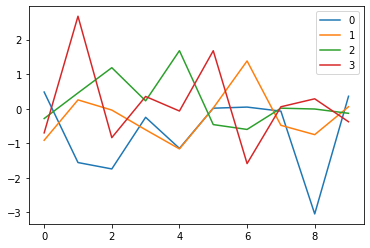

In [29]:
from matplotlib.pyplot import subplots

fig, ax = subplots()

ax.plot(na_normal, label=('0', '1', '2', '3'))
ax.legend();


__Application__

Such a random number function is ideal to create random numbers that have, for example, the same amount of numbers, the same mean and the same variance as one of your data sets. You can create as many realisations as you like, and it is thus an ideal way to simulate multiple samples for statistical testing.


## Generator of random integers

Sometimes we want to be able to generate random numbers that are _integers_. This is conveniently done with `randint`. The function takes the smallest number (included) and the largest number (excluded) of an interval as arguments and creates all integers in that interval with equal probability. 

As an example, let us create random numbers that are either 0 or 1.


[[1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0]
 [1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1]
 [0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1]
 [0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0]
 [0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0]
 [1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1]
 [1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1]
 [0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0]
 [0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1]
 [1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1]
 [0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1]
 [1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1]
 [0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0]
 [0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0]
 [1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1]]


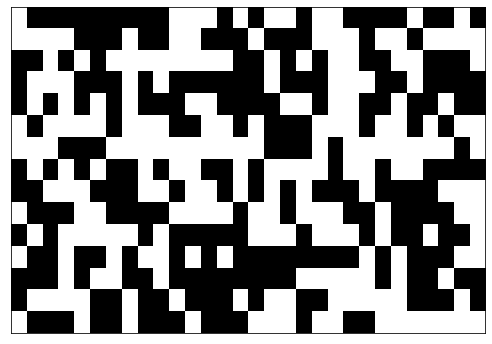

In [30]:
from numpy.random import randint

data_int = randint(0, 2, (15, 30))

print(data_int)

fig, ax = subplots(figsize=(8.5, 6))

ax.imshow(data_int, aspect='auto', cmap='gray', interpolation='None');
ax.set_xticks([]), ax.set_yticks([]);


In the heatmap, zero is coded as black, 1 is white.

__Application__: We can use this function to create (random) labels for supervised machine learning.


# Mesh grid

The function `meshgrid` creates coordinate matrices from coordinate vectors. To see what this means and how this works, we can pretend that we need to have an equally spaced grid of $n\times m$ numbers. 

We can start by defining arrays with length $n$ and $m$.


In [31]:
dim_1, dim_2 = 5, 4

arr_1 = arange(dim_1)
arr_2 = arange(dim_2)

print(arr_1, arr_2)


[0 1 2 3 4] [0 1 2 3]


We then use meshgrid to create two $n \times m$ matrices:

In [32]:
from numpy import arange, meshgrid

grid_1, grid_2 = meshgrid(arr_1, arr_2)

print(grid_1, grid_2, sep='\n\n')


[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


They both have the size of the grid that we want. Think of the first as providing the horizontal coordinate, and the second as providing the vertical coordinate in the plane.

When we concatenate them, we get the set of all coordinate pairs. This is called the Cartesian product and can be used to define the coordinates of a plane.


In [33]:
grid_1_reshape, grid_2_reshape = grid_1.reshape(-1), grid_2.reshape(-1)

combined = c_[grid_1_reshape, grid_2_reshape]

print(combined)


[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]]


__Application__: The Cartesian product allows us to create the coordinates of an arbitrary space where we want to evaluate the performance of a trained machine learning model. Here is an example how to plot the grid:


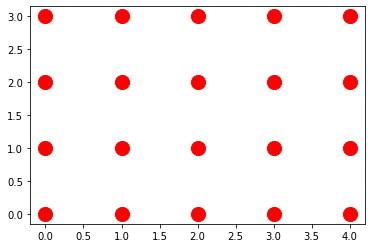

In [34]:
fig, ax = subplots()

ax.scatter(grid_1_reshape, grid_2_reshape, c='r', s=200);



> __Distraction__: Use `uniform` to assign random colors to the dots and use `randint` to plot dots of random size!


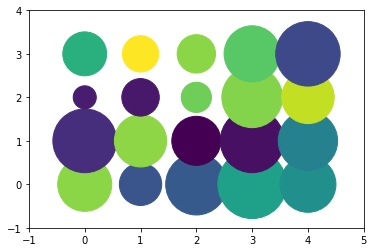

In [35]:
from numpy.random import uniform

fig, ax = subplots()

color = uniform(size=dim_1*dim_2)

min_size = 500
max_size = 5000

size  = randint(min_size, max_size, size=dim_1*dim_2)

ax.scatter(grid_1_reshape, grid_2_reshape, c=color, s=size);
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 4);


# Example: Bringing it all together

Let us now use some of the above Numpy functionality to build a noisy shape in 3D.

Check the code line by line and see if you can work out what happens. Feel free to modify it and experiment each of the components. E.g. change the grid resolution, the noise level, and plot the paraboloid to see what it looks like. 


In [36]:
from matplotlib.pyplot import figure
from numpy import exp


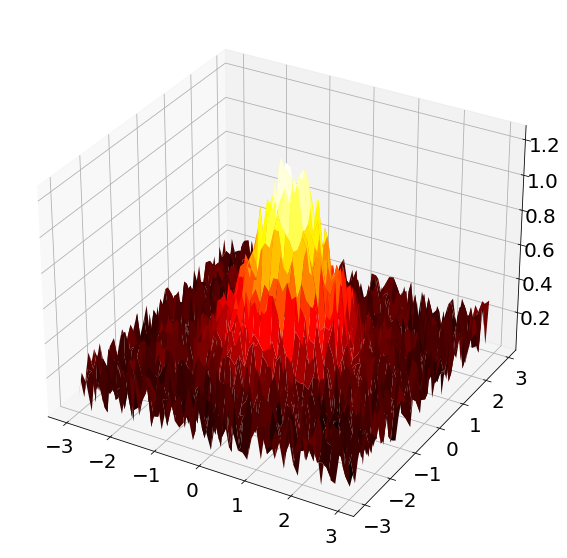

In [37]:
# Make a grid
X = arange(-3, 3, 0.1)
Y = arange(-3, 3, 0.1)

X_grid, Y_grid = meshgrid(X, Y)


# Create an array of randon numbers on the grid
noise_level = 0.3

noise = noise_level*uniform(size=(X.size, Y.size))


# On the grid, compose a paraboloid 
paraboloid = X_grid**2 + Y_grid**2


# Transform and add noise
Z = exp(-paraboloid) + noise


# Plot as a 3D surface
fig = figure(figsize=(10,10))
ax  = fig.add_subplot(projection='3d')

ax.plot_surface(X_grid, Y_grid, Z, cmap='hot')

ax.tick_params(axis='both', labelsize=20)
